In [1]:
%load_ext autoreload
%autoreload 2

import os
os.chdir("../")

%matplotlib notebook
import matplotlib.pylab as plt
# pylab.rcParams['figure.figsize'] = (10, 5)

In [2]:
from ld_gan import visualize
import numpy as np
import ld_gan
import scipy.misc
from tqdm import tqdm
import ld_gan.utils.utils as ld

# load data

In [3]:
path = "data/faceScrub/crop_test/"
Xt, Yt = ld_gan.data_proc.data_loader.load_data(path, verbose=1, resize = 128)
Yt = np.argmax(Yt, axis = 1)

100%|██████████| 530/530 [02:15<00:00,  5.92it/s]

load data from 'data/faceScrub/crop_test/'


In [4]:
Xt_64 = np.array([scipy.misc.imresize(x, (64,64)) for x in tqdm(Xt)])

100%|██████████| 7019/7019 [00:01<00:00, 3849.69it/s]


In [144]:
path = "data/faceScrub/crop_train/"
X, Y = ld_gan.data_proc.data_loader.load_data(path, verbose=1, resize = 128)
Y = np.argmax(Y, axis = 1)

100%|██████████| 530/530 [12:19<00:00,  1.20s/it]

load data from 'data/faceScrub/crop_train/'


In [145]:
X_64 = np.array([scipy.misc.imresize(x, (64,64)) for x in tqdm(X)])

100%|██████████| 62835/62835 [00:14<00:00, 4278.87it/s]


In [146]:
Xt_64_100 = Xt_64[Yt <= 100]
Yt_100 = Yt[Yt <= 100]

# show

cuda runtime error (10) : invalid device ordinal at torch/csrc/cuda/Module.cpp:87
found gpu mapping:  {'cuda:2': 'cuda:0'}
loaded model 'projects/xs_111v1_nnscs_trip.py/model/e_0020.pth'
cuda runtime error (10) : invalid device ordinal at torch/csrc/cuda/Module.cpp:87
found gpu mapping:  {'cuda:2': 'cuda:0'}
loaded model 'projects/xs_111v1_nnscs_trip.py/model/g_0020.pth'
compute tsne...


<IPython.core.display.Javascript object>


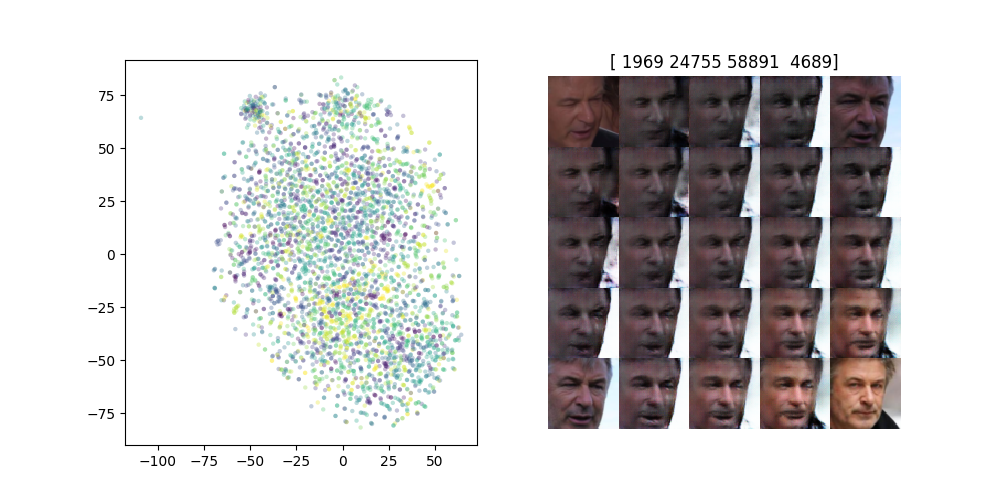

(62835,) (4000, 2)


In [158]:
# xS_111v1_gclf_scs_new
visualize.tsne_to_interpol_arr(Xt, Yt,  
                              "xS_111v1_gclf_scs_new.py", 
                               30,  
                               z_mapped = None,
                               n_neighbors = 4,
                               sampler=None,
                               alpha = 0.3,
                               n_pts_tsne = 4000,
                               real_img_mode = "all+mean",
                               small = False,
                               nn_within_class = True,
                               recompute_tsne = True
                              )

# save idxs

In [5]:
def save_idxs(project, epoch = "", path = "data/faceScrub/nn_idxs_train.txt"):
    path_imgs = os.path.join("projects", project, "_demo_imgs/" + epoch)
    fnames = ld.listdir(path_imgs, ".png", True)
    idxs = [" ".join(fname.split("[")[-1].split("]")[0].split("' '")) for fname in fnames]
    
    with open(path, 'r') as f:
        content = f.read()
    lines = content.split("\n")
    
    for idx in idxs:
        if idx not in lines:
            lines.append(idx)
            
    with open(path, 'w') as f:
        for line in lines:
            f.write("%s\n" % line)

In [6]:
save_idxs("XS_111v1_gclf_scs_new.py")

In [3]:
with open("data/faceScrub/nn_idxs_test.txt", 'w') as f:
    f.write("")

# generate images

In [136]:
def gen_imgs(X, project, epoch, save = False, test = False,
             path = "data/faceScrub/nn_idxs_train.txt"):

    enc = ld_gan.utils.model_handler.load_model(project, epoch, "enc")
    gen = ld_gan.utils.model_handler.load_model(project, epoch, "gen")
    
    with open("data/faceScrub/nn_idxs_train.txt", 'r') as f:
        content = f.read()
    lines = content.split("\n")
    
    idxs = []
    for line in lines:
        i = []
        for l in line.split(" "):
            try:
                i.append(int(l))
            except:
                pass
        idxs.append(i)
    
    arr_imgs = []
    for i in tqdm(idxs):
        try:
            imgs = X[i]
            arr_imgs.append(visualize.make_corner_img(imgs, enc, gen))
        except:
            print "ERROR:", i
    
    if save:
        for i, ai in zip(idxs, arr_imgs):
            tetr_str = "test" if test else "train"
            path = os.path.join("projects", 
                                project, 
                                "interpol_arr", 
                                tetr_str, 
                                str(epoch).zfill(3))
            ld.mkdir(path)
            fname = os.path.join(path, str(i) + ".jpg")
            scipy.misc.imsave(fname, ai)
    else:
        return arr_imgs

In [153]:
# xs_111v1_nnscs_trip_f5
img_arr = gen_imgs(Xt, "xS_111v1_gclf_scs_new.py", 80, save = False, test = True)

cuda runtime error (10) : invalid device ordinal at torch/csrc/cuda/Module.cpp:87
found gpu mapping:  {'cuda:5': 'cuda:0'}
loaded model 'projects/xS_111v1_gclf_scs_new.py/model/e_0080.pth'
cuda runtime error (10) : invalid device ordinal at torch/csrc/cuda/Module.cpp:87
found gpu mapping: 

 71%|███████   | 24/34 [00:01<00:00, 23.87it/s]

 {'cuda:5': 'cuda:0'}
loaded model 'projects/xS_111v1_gclf_scs_new.py/model/g_0080.pth'
ERROR:

 94%|█████████▍| 32/34 [00:01<00:00, 26.04it/s]

 []
ERROR: []
ERROR:

100%|██████████| 34/34 [00:01<00:00, 26.14it/s]

 []


<IPython.core.display.Javascript object>


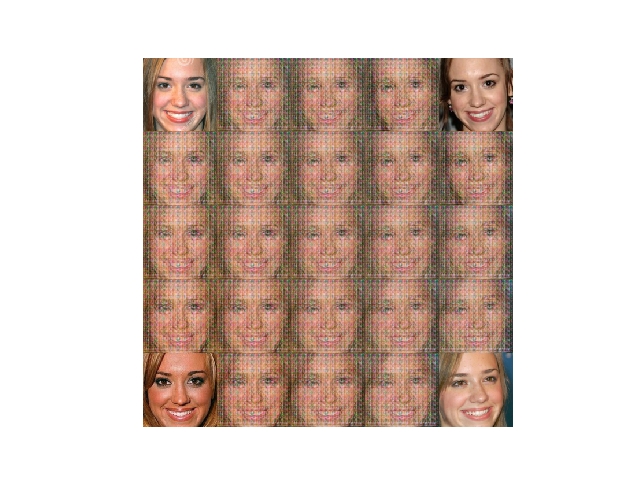

In [155]:
ld.disp(img_arr[1])

In [60]:
idx = idxs[0]

In [61]:
" ".join(idx)

'3391 4165 5367 1909'

In [63]:
with open("data/faceScrub/nn_idxs_train.txt", 'w') as f:
    f.write('3391 4165 5367 1909')